In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value

from jcopml.feature_importance import mean_score_decrease

# EDA 

In [2]:
dfIris = pd.read_csv("../Iris_Data_Classification_and_EDA/dataset/iris/Iris.csv")
dfIris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [3]:
dfIris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
dfIris.drop(columns="Id", inplace=True)


In [5]:
dfIris

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

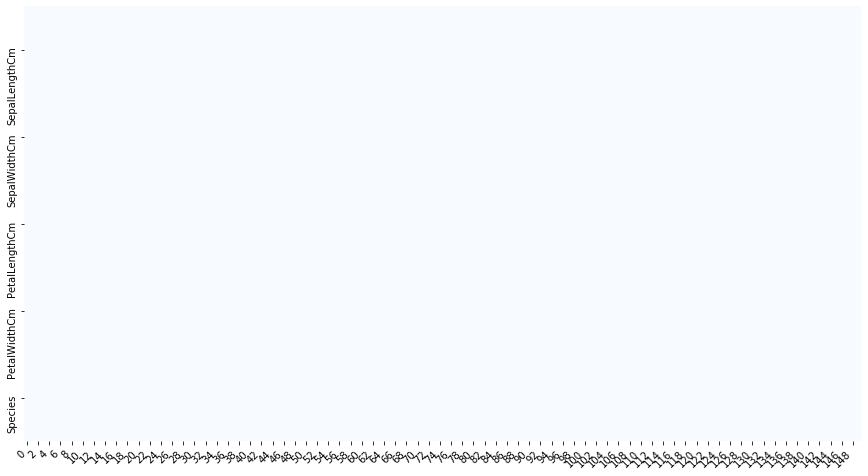

In [6]:
plot_missing_value(dfIris)

In [7]:
dfIris.duplicated().value_counts()

False    147
True       3
dtype: int64

In [8]:
dfIris.drop_duplicates(inplace=True)


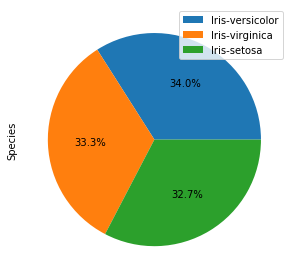

In [9]:
dfIris['Species'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

In [10]:
dfIris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

# Data Splitting

In [11]:
X = dfIris.drop(columns="Species")
y = dfIris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((117, 4), (30, 4), (117,), (30,))

# Data Prepocessor

In [12]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.svm import SVC

In [13]:
X_train.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
67             5.8           2.7            4.1           1.0
90             5.5           2.6            4.4           1.2
103            6.3           2.9            5.6           1.8
52             6.9           3.1            4.9           1.5
129            7.2           3.0            5.8           1.6

In [14]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="standard"), ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

model1 = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model1.fit(X_train, y_train)

print(model1.best_params_)
print(model1.score(X_train, y_train), model1.best_score_, model1.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.4s


{'algo__C': 1.0, 'algo__gamma': 0.1}
0.9743589743589743 0.9743589743589743 0.9666666666666667


[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    4.9s finished


In [15]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling="minmax"), ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])

model2 = GridSearchCV(pipeline, gsp.svm_params, cv=3, n_jobs=-1, verbose=1)
model2.fit(X_train, y_train)

print(model2.best_params_)
print(model2.score(X_train, y_train), model2.best_score_, model2.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 1.0, 'algo__gamma': 1.0}
0.9743589743589743 0.9743589743589743 0.9333333333333333


[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    0.8s finished


### Plot perbandingan model akurasi

In [16]:
dataSkor =  pd.DataFrame(data=model2.cv_results_)
dataSkor

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.010996  8.130313e-04         0.005335    4.694599e-04   
1        0.010999  8.160492e-04         0.004667    4.723838e-04   
2        0.011667  4.733375e-04         0.004666    4.728885e-04   
3        0.010338  4.769919e-04         0.004663    4.755855e-04   
4        0.010333  4.731168e-04         0.004335    4.713718e-04   
5        0.011668  9.421812e-04         0.005001    2.570305e-06   
6        0.012333  2.620916e-03         0.005999    7.867412e-07   
7        0.013001  2.161894e-03         0.005332    4.712023e-04   
8        0.013668  1.248595e-03         0.005999    1.413718e-03   
9        0.012002  8.158571e-04         0.004000    8.170216e-04   
10       0.010671  4.709208e-04         0.003995    2.973602e-07   
11       0.009000  1.413605e-03         0.004000    5.947204e-07   
12       0.009001  1.413605e-03         0.004334    4.728314e-04   
13       0.010333  9.426845e-04         0.005000    1.408263e-06   
14       0.010667  4.715394e-04         0.005333    4.705274e-04   
15       0.011000  1.857014e-06         0.005000    8.161458e-04   
16       0.011000  1.123916e-07         0.006666    2.356346e-03   
17       0.010666  4.715394e-04         0.005000    8.162427e-04   
18       0.010666  4.707534e-04         0.004332    4.718206e-04   
19       0.009666  4.713142e-04         0.005001    8.160481e-04   
20       0.010668  4.710906e-04         0.004665    1.246831e-03   
21       0.010001  1.573482e-06         0.004000    1.362676e-06   
22       0.011000  3.893359e-07         0.004333    4.721571e-04   
23       0.009667  4.703598e-04         0.005000    6.743496e-07   
24       0.011001  8.169241e-04         0.004666    4.724944e-04   
25       0.010000  1.011524e-06         0.004670    4.650202e-04   
26       0.010000  8.158537e-04         0.004000    8.163404e-04   
27       0.008993  8.237451e-04         0.004000    3.371748e-07   
28       0.010331  4.730029e-04         0.004668    9.422924e-04   
29       0.009664  1.250976e-03         0.008667    5.906765e-03   
30       0.011001  1.184119e-06         0.004666    4.713154e-04   
31       0.010667  9.427973e-04         0.008665    6.599241e-03   
32       0.011001  8.991328e-07         0.004999    3.371748e-07   
33       0.011001  5.150430e-07         0.005332    4.720449e-04   
34       0.011333  4.712580e-04         0.005000    1.766373e-06   
35       0.011000  1.700793e-06         0.004666    4.712019e-04   
36       0.010333  4.721026e-04         0.004333    4.709771e-04   
37       0.010333  9.447641e-04         0.004667    9.423477e-04   
38       0.010334  9.416734e-04         0.007665    3.772143e-03   
39       0.012333  1.886043e-03         0.005001    9.602742e-07   
40       0.011001  8.920806e-07         0.005000    8.920806e-07   
41       0.011334  4.705277e-04         0.004999    8.991328e-07   
42       0.011000  1.140650e-06         0.004999    8.165348e-04   
43       0.009668  4.718769e-04         0.004665    4.713705e-04   
44       0.010667  4.717642e-04         0.004333    4.717654e-04   
45       0.009665  4.726067e-04         0.004002    1.632582e-06   
46       0.009664  4.703043e-04         0.004668    4.715390e-04   
47       0.010333  4.709214e-04         0.004666    4.682808e-04   
48       0.010338  9.458974e-04         0.004002    8.185474e-04   

   param_algo__C param_algo__gamma  \
0          0.001             0.001   
1          0.001              0.01   
2          0.001               0.1   
3          0.001                 1   
4          0.001                10   
5          0.001               100   
6          0.001              1000   
7           0.01             0.001   
8           0.01              0.01   
9           0.01               0.1   
10          0.01                 1   
11          0.01                10   
12          0.01               100   
13          0.01              1000   
14           0.1             0.00

In [17]:
dataSkor.param_algo__gamma.shape, dataSkor.rank_test_score.shape

((49,), (49,))

In [18]:
dataGamma =  dataSkor.param_algo__gamma.values
dataMeanScore = dataSkor.mean_score_time.values
dataGamma, dataMeanScore

(array([0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 0.001, 0.01, 0.1, 1.0,
        10.0, 100.0, 1000.0, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
        0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 0.001, 0.01, 0.1, 1.0,
        10.0, 100.0, 1000.0, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
        0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], dtype=object),
 array([0.00533493, 0.00466728, 0.00466561, 0.00466251, 0.00433469,
        0.00500139, 0.00599941, 0.00533152, 0.00599941, 0.00399979,
        0.00399454, 0.00400027, 0.00433405, 0.00499996, 0.00533295,
        0.00500011, 0.00666618, 0.00500035, 0.00433215, 0.00500059,
        0.00466545, 0.00399995, 0.00433286, 0.00499988, 0.00466601,
        0.00466998, 0.00399987, 0.00399971, 0.00466839, 0.00866723,
        0.00466625, 0.00866548, 0.0049994 , 0.00533223, 0.00499996,
        0.00466609, 0.00433334, 0.00466736, 0.00766516, 0.00500067,
        0.00499964, 0.00499948, 0.00499948, 0.00466537, 0.00433342,
        0.00400201, 0.00

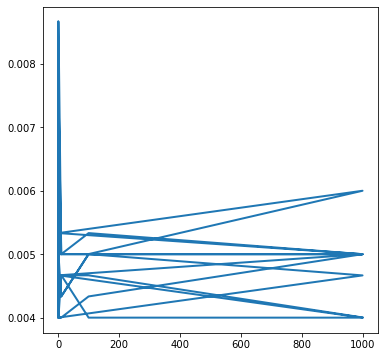

In [19]:
fig  = plt.figure(figsize=(6,6))
ax = plt.axes()
# ax.plot(["Jerry", "Tom", "Merani"], [44,22,33,22], color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax.plot(dataGamma, dataMeanScore, linewidth=2, markersize=12)
# ax.plot(x, y2, "bo", markersize=3)
# ax.set_xlim(0, 10)
# ax.set_ylim(-4, 4)



In [20]:
X_test

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
63             6.1           2.9            4.7           1.4
84             5.4           3.0            4.5           1.5
141            6.9           3.1            5.1           2.3
44             5.1           3.8            1.9           0.4
147            6.5           3.0            5.2           2.0
77             6.7           3.0            5.0           1.7
56             6.3           3.3            4.7           1.6
40             5.0           3.5            1.3           0.3
138            6.0           3.0            4.8           1.8
127            6.1           3.0            4.9           1.8
7              5.0           3.4            1.5           0.2
14             5.8           4.0            1.2           0.2
49             5.0           3.3            1.4           0.2
69             5.6           2.5            3.9           1.1
140            6.7           3.1            5.6           2.4
18             5.7           3.8            1.7           0.3
58             6.6           2.9            4.6           1.3
28             5.2           3.4            1.4           0.2
107            7.3           2.9            6.3           1.8
20             5.4           3.4            1.7           0.2
57             4.9           2.4            3.3           1.0
134            6.1           2.6            5.6           1.4
10             5.4           3.7            1.5           0.2
22             4.6           3.6            1.0           0.2
75             6.6           3.0            4.4           1.4
74             6.4           2.9            4.3           1.3
104            6.5           3.0            5.8           2.2
116            6.5           3.0            5.5           1.8
132            6.4           2.8            5.6           2.2
51             6.4           3.2            4.5           1.5

In [21]:
y_test

63     Iris-versicolor
84     Iris-versicolor
141     Iris-virginica
44         Iris-setosa
147     Iris-virginica
77     Iris-versicolor
56     Iris-versicolor
40         Iris-setosa
138     Iris-virginica
127     Iris-virginica
7          Iris-setosa
14         Iris-setosa
49         Iris-setosa
69     Iris-versicolor
140     Iris-virginica
18         Iris-setosa
58     Iris-versicolor
28         Iris-setosa
107     Iris-virginica
20         Iris-setosa
57     Iris-versicolor
134     Iris-virginica
10         Iris-setosa
22         Iris-setosa
75     Iris-versicolor
74     Iris-versicolor
104     Iris-virginica
116     Iris-virginica
132     Iris-virginica
51     Iris-versicolor
Name: Species, dtype: object

In [22]:
xPred = model2.predict(X_test)
xPred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor'],
      dtype=object)

In [23]:
finalIris = dfIris.drop(columns="Species")
yFinalIris = dfIris.Species
finalIris

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[147 rows x 4 columns]

In [29]:
finalPredict = model2.predict(finalIris)
finalPredict

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
    

In [34]:
yFinalIris

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

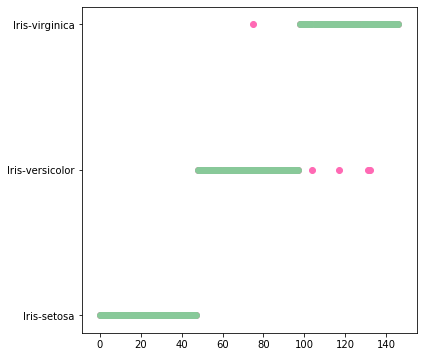

In [64]:
fig = plt.figure(figsize=(6,6))
# ax = plt.axes()
# ax.plot(range(0, len(finalPredict)), finalPredict, "r",markersize=6)
# ax.plot(range(0, len(yFinalIris)), yFinalIris, "g", markersize=6)
plt.scatter(range(0, len(finalPredict)), finalPredict, color = 'hotpink')
plt.scatter(range(0, len(yFinalIris)), yFinalIris, color = '#88c999')



In [78]:
finalPredict.ar, yFinalIris.dtype

(array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-ve

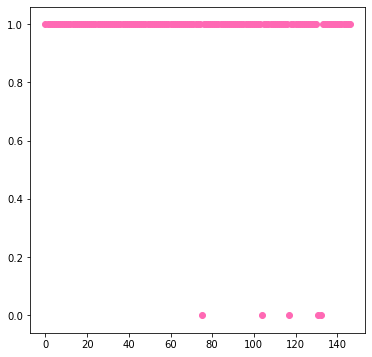

In [90]:
dataFilter = finalPredict == yFinalIris.values
fig = plt.figure(figsize=(6,6))
plt.scatter(range(0, len(dataFilter)), dataFilter, color = 'hotpink')
